# Association Analysis

**One of the most important fields in data mining with a lot of applications**

1. Market Basket Analysis
2. Recommender Systems
3. Medical Diagnosis
4. Census Data
5. CRM (Customer Relationship Management)

## Market Basket Analysis
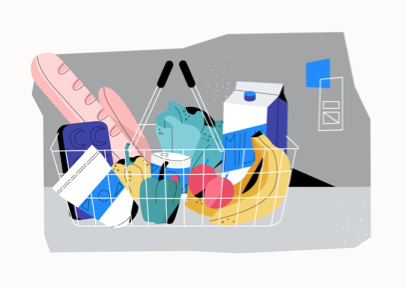


Consider a set of items $I=\{I_1,I_2,...,I_n\}$:
* A **Transaction** $T_i$ is a set of items $I_j \hbox{ where } 1\leq j \leq n$ and  $T_i \subseteq I$
* $T=\{T_1, T_2, \dots \}$ is a set of transactions
* An **Associotion Rule** is written in the form of $X \Rightarrow Y$, where $X,Y \subseteq I$ and $X \cap Y= \emptyset$. $X$ and $Y$ are $\textbf{ancendent}$ e $\textbf{consequent}$ of the rule.   

## Support
$\textbf{Support}(X)= \frac{|T_i : X \in T_i|}{|T|}$ <br/><br/>
$\textbf{Support}(X \Rightarrow Y)=\textbf{Support}(X \cup Y)\,\,\,\,\,\hbox{range:}[0,1]$ 
<br/><br/>
**Support** actually shows us the frequency of presence of a set/rule in the set of transactions

## Confidence
$\textbf{Confidence}(X \Rightarrow Y)=\frac{\textbf{Support}(X \Rightarrow Y)}{\textbf{Support}(X)}\,\,\,\,\,\hbox{range:}[0,1]$

Interpretation: Confidence tells us the probability of presence of Y given X is present.

## Lift
$\textbf{Lift}(X \Rightarrow Y)=\frac{\textbf{Confidence}(X \Rightarrow Y)}{\textbf{Support}(Y)}\,\,\,\,\,\hbox{range:}[0,\infty)$

Interpretation: How much the probability of presence of Y does change when X is present in the transaction.

## Leverage
$\textbf{Leverage}(X \Rightarrow Y)=\textbf{Support}(X \cup Y)-\textbf{Support}(X).\textbf{Support}(Y)\,\,\,\,\,\hbox{range:}[-1,1]$ 

$\textbf{Leverage}(X \Rightarrow Y)=\textbf{Leverage}(Y \Rightarrow X)$

Interpretation: Leverage indicates dependency between X and Y. When leverage is zero, it means that X and Y have no dependency(independent), when it is positive value, X and Y have positive dependency, which means that the presence of one, will increase the probability of presence of another one, and finally when leverage is negative, X and Y have negative dependencies which means that the presence of one in a transaction will reduce the probability of the other in the transaction.


## Convinction
$\textbf{Convinction}(X \Rightarrow Y)=\frac{1-\textbf{Support}(Y)}{1-\textbf{Confidence}(X \Rightarrow Y)}\,\,\,\,\,\hbox{range:}[0,\infty)$


# Algorithms
## Apriori
## FP-Growth

# Association Analysis & Python
[Kaggle Groceries](https://www.kaggle.com/irfanasrullah/groceries)

In [98]:
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# import apriori and fp-growth algorithms packages
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth

import pandas as pd

In [150]:
groc=pd.read_csv('datasets_264386_555058_groceries - groceries.csv')
print(groc.columns)

groc=groc.drop('Item(s)',axis=1)
groc=groc.values.tolist()

# remove nan values from groc
groc = [[ele for ele in sub if type(ele) != float] for sub in groc] 

Index(['Item(s)', 'Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6',
       'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12',
       'Item 13', 'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18',
       'Item 19', 'Item 20', 'Item 21', 'Item 22', 'Item 23', 'Item 24',
       'Item 25', 'Item 26', 'Item 27', 'Item 28', 'Item 29', 'Item 30',
       'Item 31', 'Item 32'],
      dtype='object')


In [161]:
te = TransactionEncoder()
te_ary = te.fit(groc).transform(groc)
df = pd.DataFrame(te_ary, columns=te.columns_)

#apriori
frequent_itemsets_apriori = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets_fpgrowth = fpgrowth(df, min_support=0.1, use_colnames=True)


In [162]:
frequent_itemsets_apriori.sort_values(by=['support'],ascending=False)

,support,itemsets
86,0.255516,(whole milk)
55,0.193493,(other vegetables)
66,0.183935,(rolls/buns)
75,0.174377,(soda)
87,0.139502,(yogurt)
...,...,...
178,0.010066,"(frankfurter, sausage)"
306,0.010066,"(whole milk, yogurt, curd)"
160,0.010066,"(rolls/buns, curd)"
212,0.010066,"(tropical fruit, napkins)"


In [163]:
frequent_itemsets_fpgrowth.sort_values(by=['support'],ascending=False)

,support,itemsets
2,0.255516,(whole milk)
3,0.193493,(other vegetables)
4,0.183935,(rolls/buns)
6,0.174377,(soda)
0,0.139502,(yogurt)
5,0.110524,(bottled water)
7,0.108998,(root vegetables)
1,0.104931,(tropical fruit)


In [166]:
rules=association_rules(frequent_itemsets_apriori, 
                        metric="conviction", min_threshold=0.1)
rules.sort_values(by=['confidence'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
439,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
510,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
458,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
434,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
589,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553
...,...,...,...,...,...,...,...,...,...
453,(whole milk),"(yogurt, citrus fruit)",0.255516,0.021657,0.010269,0.040191,1.855768,0.004736,1.019310
490,(whole milk),"(pork, other vegetables)",0.255516,0.021657,0.010168,0.039793,1.837394,0.004634,1.018887
531,(whole milk),"(other vegetables, sausage)",0.255516,0.026945,0.010168,0.039793,1.476849,0.003283,1.013381
222,(whole milk),(hard cheese),0.255516,0.024504,0.010066,0.039395,1.607682,0.003805,1.015502


In [97]:
rules.sort_values(by=['confidence'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
157,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
184,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
164,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
154,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
222,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553
...,...,...,...,...,...,...,...,...,...
45,(curd),(root vegetables),0.053279,0.108998,0.010880,0.204198,1.873407,0.005072,1.119628
34,(citrus fruit),(rolls/buns),0.082766,0.183935,0.016777,0.202703,1.102035,0.001553,1.023539
64,(fruit/vegetable juice),(rolls/buns),0.072293,0.183935,0.014540,0.201125,1.093458,0.001243,1.021518
8,(bottled beer),(other vegetables),0.080529,0.193493,0.016167,0.200758,1.037546,0.000585,1.009090


In [68]:
rules.sort_values(by=['lift'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
69,(root vegetables),"(whole milk, other vegetables)",0.108998,0.074835,0.023183,0.212687,2.842082,0.015026,1.175091
68,"(whole milk, other vegetables)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,0.015026,1.290900
40,(pip fruit),(tropical fruit),0.075648,0.104931,0.020437,0.270161,2.574648,0.012499,1.226392
66,"(root vegetables, whole milk)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320
28,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
...,...,...,...,...,...,...,...,...,...
3,(bottled water),(rolls/buns),0.110524,0.183935,0.024199,0.218951,1.190373,0.003870,1.044832
2,(bottled water),(other vegetables),0.110524,0.193493,0.024809,0.224471,1.160101,0.003424,1.039945
1,(bottled beer),(whole milk),0.080529,0.255516,0.020437,0.253788,0.993237,-0.000139,0.997684
57,(shopping bags),(whole milk),0.098526,0.255516,0.024504,0.248710,0.973364,-0.000671,0.990941


In [69]:
rules.sort_values(by=['leverage'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
27,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
33,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
34,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
52,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401
...,...,...,...,...,...,...,...,...,...
3,(bottled water),(rolls/buns),0.110524,0.183935,0.024199,0.218951,1.190373,0.003870,1.044832
2,(bottled water),(other vegetables),0.110524,0.193493,0.024809,0.224471,1.160101,0.003424,1.039945
1,(bottled beer),(whole milk),0.080529,0.255516,0.020437,0.253788,0.993237,-0.000139,0.997684
57,(shopping bags),(whole milk),0.098526,0.255516,0.024504,0.248710,0.973364,-0.000671,0.990941
